##### 7. In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.

##### (a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [1]:
import numpy as np
import pandas as pd
from ISLP import load_data 

In [2]:
df = load_data('Auto')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
x = df.drop(['mpg', 'name'], axis=1)
y = np.where(df['mpg'] > df['mpg'].median(), 1, 0)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

##### (b) Fit a support vector classifer to the data with various values of C, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with diferent values of this parameter. Comment on your results. Note you will need to ft the classifer without the gas mileage variable to produce sensible results.

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model = SVC(kernel='linear')
C_values = [0.01,10]
grid = GridSearchCV(model,
                    {'C' : C_values},
                    cv=5,
                    scoring='accuracy')
grid.fit(x, y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'), param_grid={'C': [0.01, 10]},
             scoring='accuracy')

In [5]:
pd.DataFrame({'cv score' : grid.cv_results_['mean_test_score']}, index=C_values).sort_values(by='cv score', ascending=False)

,cv score
0.01,0.877605
10.00,0.862480


C=0.01 has best cv score

##### (c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with diferent values of gamma and degree and C. Comment on your results.

In [6]:
poly = SVC(kernel='poly')
degree = [2, 50]
poly_grid = {'C' : C_values,
             'degree' : degree}
grid_poly = GridSearchCV(poly,
                         poly_grid,
                         cv=5,
                         scoring='accuracy').fit(x,y)
grid_poly.best_params_

In [ ]:
radial = SVC()
gamma = np.logspace(-2, 2, 3)
radial_grid = {'C' : C_values,
             'gamma' : gamma}
grid_radial = GridSearchCV(radial,
                         radial_grid,
                         cv=5,
                         scoring='accuracy').fit(x,y)
grid_radial.best_params_

{'C': 0.01, 'gamma': 0.01}

In [ ]:
from ISLP.svm import plot
def plotsvm(model):
    for i in range(x.shape[1]):
        if i != x.shape[1] - 1:
            plot(x, y, model, features=[i,i+1], scatter_cmap='winter', decision_cmap='coolwarm')
        else:
            plot(x, y, model, features=[i,0], scatter_cmap='winter', decision_cmap='coolwarm')

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid fe

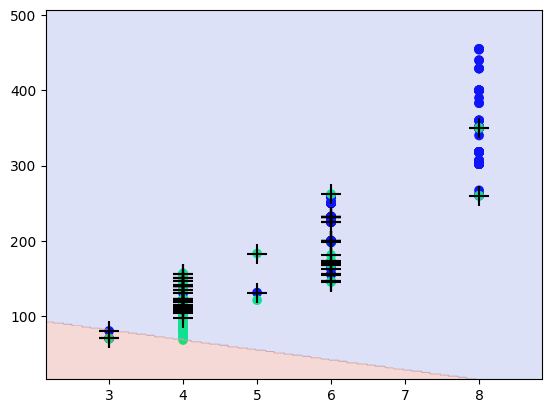

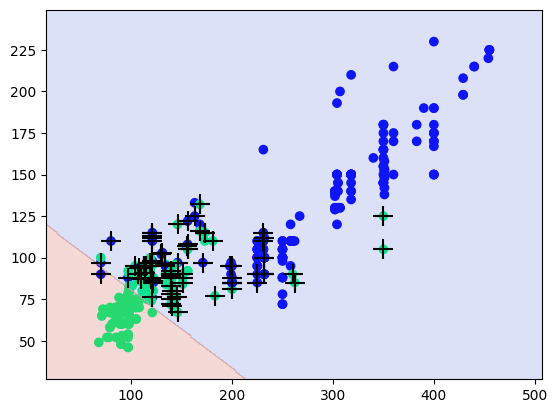

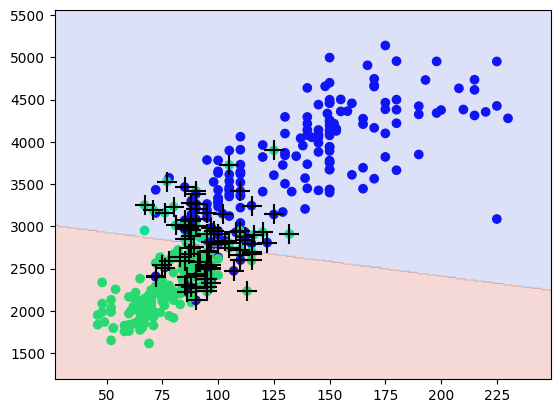

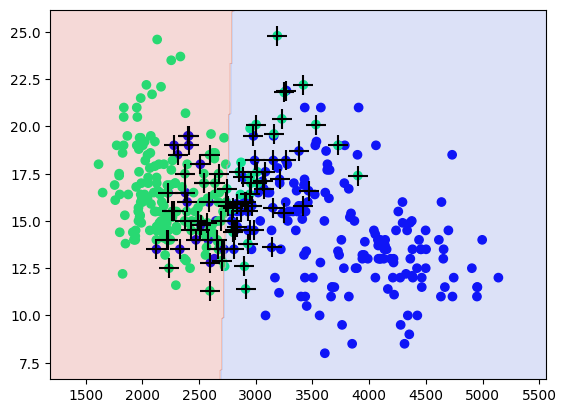

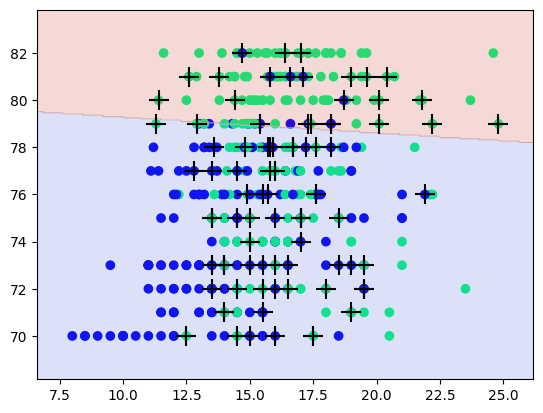

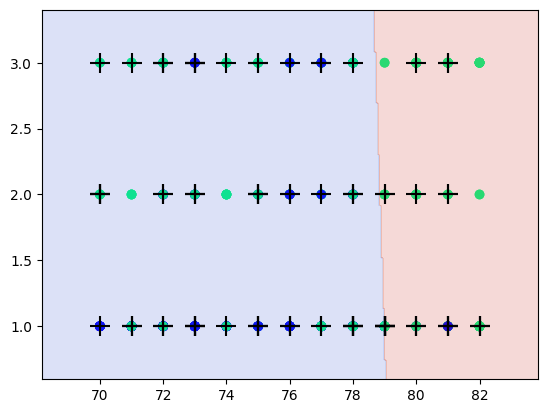

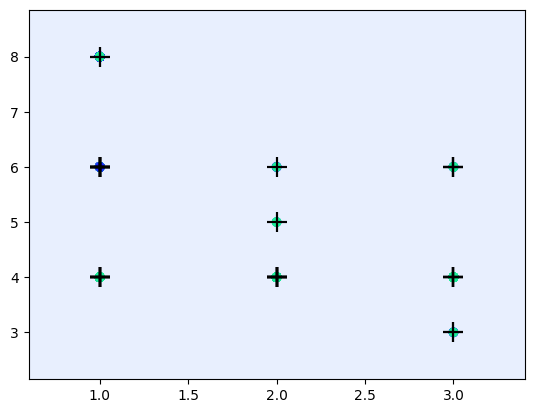

In [ ]:
plotsvm(grid.best_estimator_)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid fe

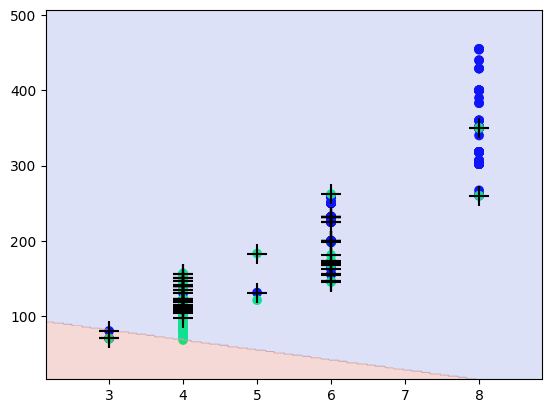

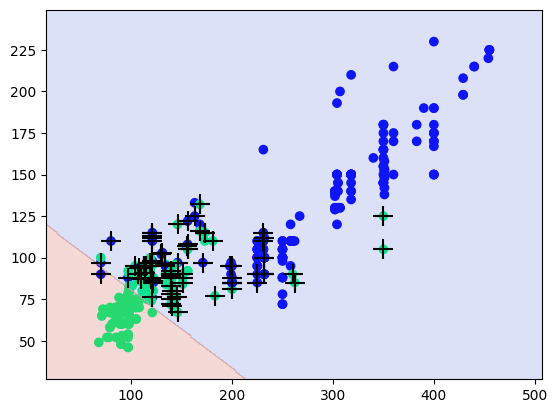

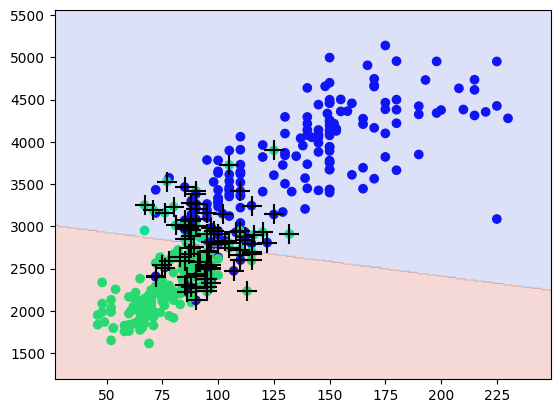

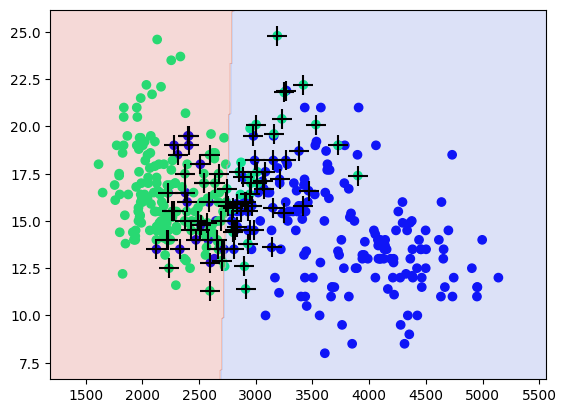

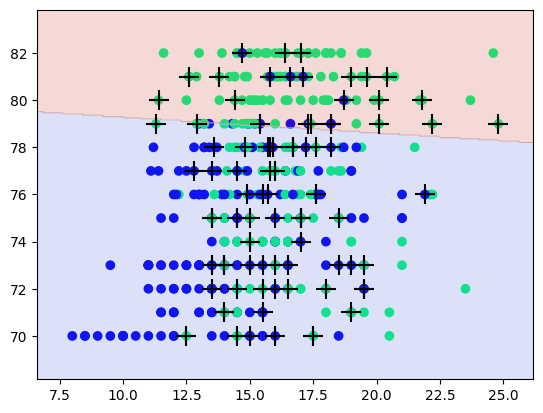

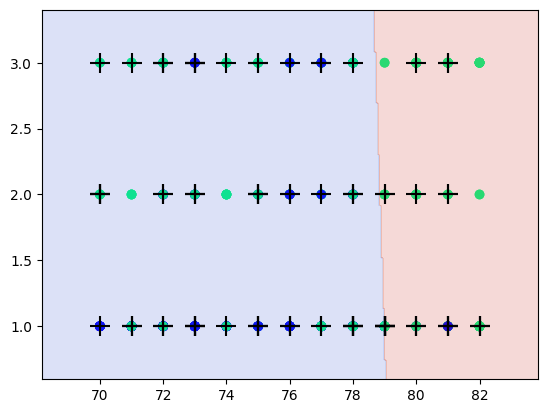

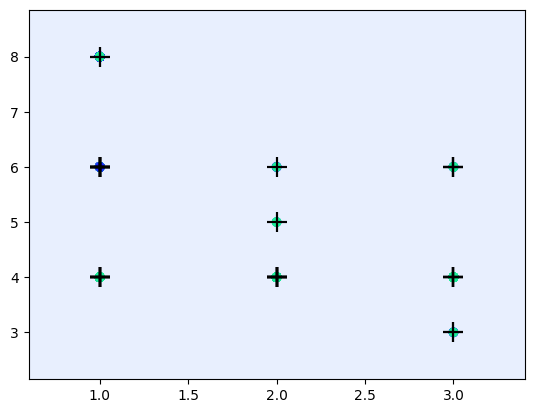

In [ ]:
plotsvm(grid_poly.best_estimator_)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid fe

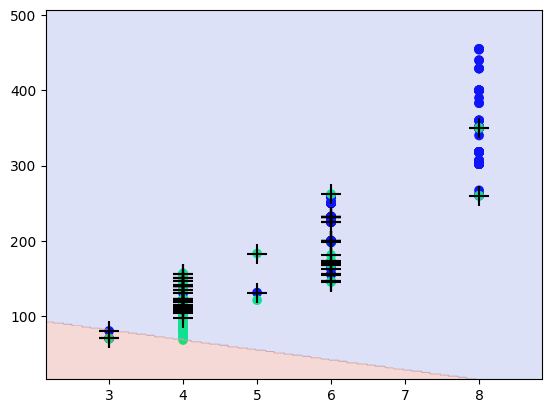

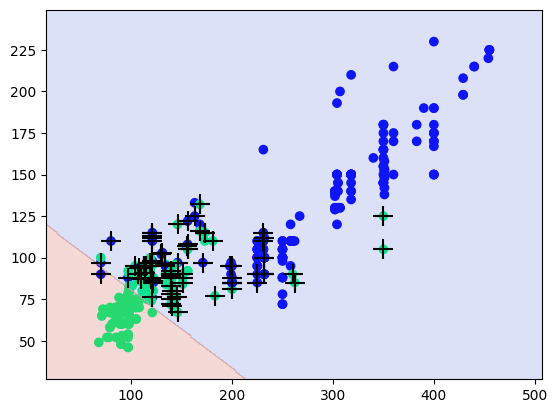

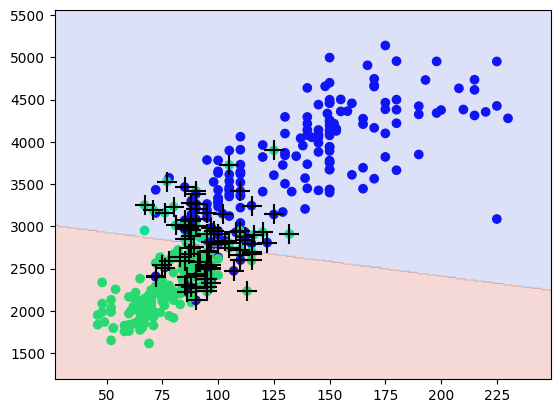

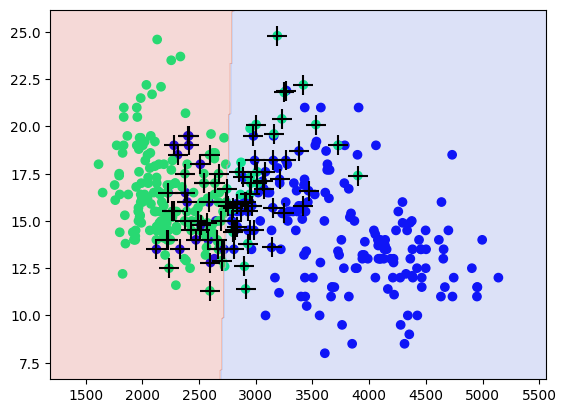

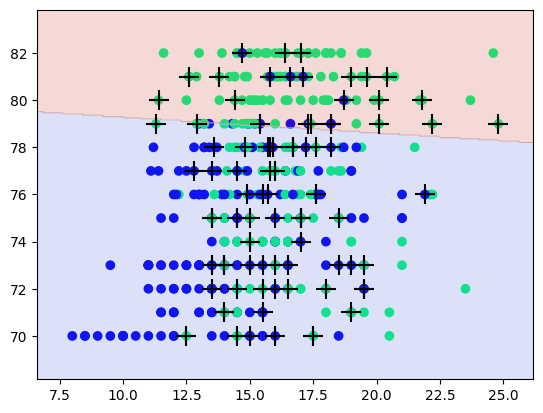

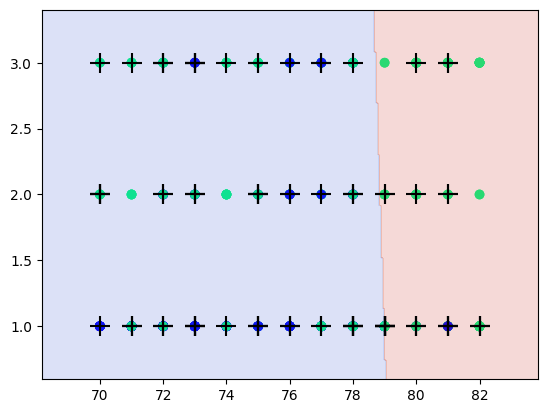

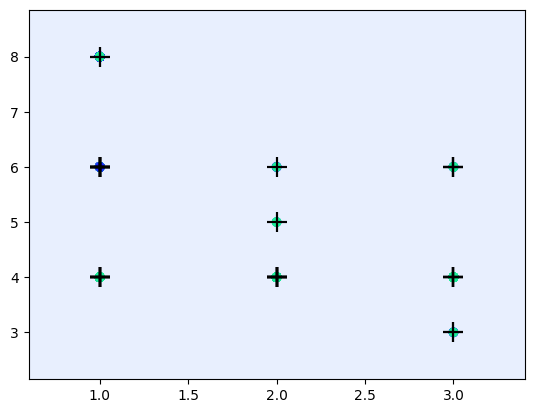

In [ ]:
plotsvm(grid_radial.best_estimator_)